<a href="https://colab.research.google.com/github/shramkoartem/HackerRank/blob/master/Tensorflow_tutorial_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

1.15.0-rc3


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
train_img.shape

(60000, 28, 28)

In [22]:
len(train_labels)

60000

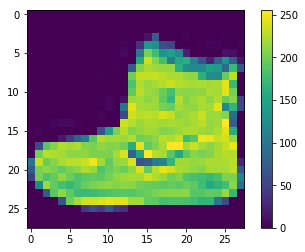

In [23]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_img = train_img / 255.0
test_img = test_img / 255.0

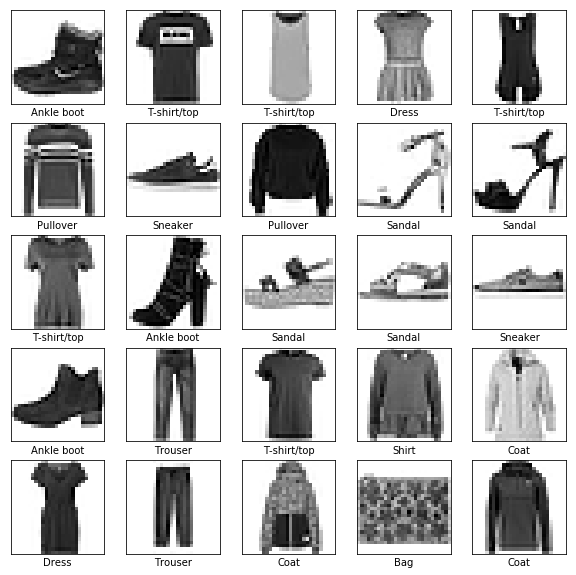

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])



In [27]:
model.fit(train_img, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5264 - acc: 0.8139
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3957 - acc: 0.8559
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3645 - acc: 0.8663
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3448 - acc: 0.8743
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3300 - acc: 0.8786
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3156 - acc: 0.8828
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3029 - acc: 0.8877
Epoch 8/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2966 - acc: 0.8903
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2872 - acc: 0.8929
Epoch 10/10
60000/60000 [==============================] - 

In [28]:
test_loss, test_acc = model.evaluate(test_img, test_labels, verbose=2)

10000/10000 - 0s - loss: 0.3392 - acc: 0.8814


In [29]:
predictions = model.predict(test_img)

predictions[0]

array([1.6767428e-08, 3.7228680e-09, 1.9060373e-09, 4.7769348e-11,
       1.0802546e-10, 2.1703788e-03, 1.6254184e-08, 7.3872760e-02,
       6.0228160e-08, 9.2395663e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

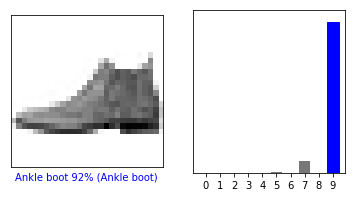

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

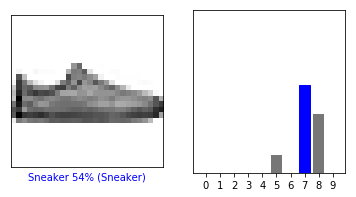

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

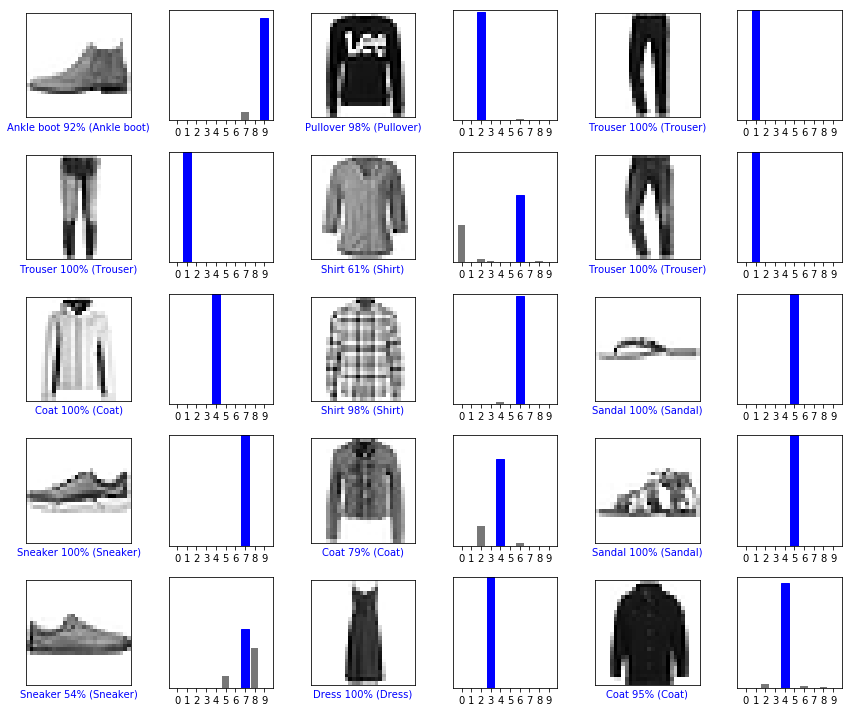

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()